# Forecast Electric power consumption - Using LSTM Model
## Table of Content
<ul>
    <li><a href="#lstm1">Modeling with LSTM Befor Augmenting</a></li>
    <li><a href="#lstm2">Modeling with LSTM After Augmenting</a></li>
</ul>

In [1]:
import pandas as pd
import math
import numpy as np

# ---------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
import pylab 
plt.rcParams['figure.figsize']=(17,5)

# ---------------------------------------
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot

# ---------------------------------------
from prophet import Prophet
import holidays
from sklearn.metrics import mean_squared_error, mean_absolute_error

# ---------------------------------------
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

#----------------------------------------
from statsmodels.tsa.arima.model import ARIMA

import warnings
warnings.filterwarnings("ignore")

In [4]:

def calc_acc(list1, list2):
    y_true = np.array(list1)
    y_pred = np.array(list2)
    
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    
    accuracy_percentage = 100 - mape

    print("Mean Absolute Percentage Error (MAPE):", mape)
    print("Accuracy Percentage:", accuracy_percentage)

# --------------------------------------------------------------------
    
    
def MAPE(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


def LSTM_Modeling(path, col, tr, text):
    # Load your time series data
    data = pd.read_csv(path, parse_dates=['Datetime'], index_col='Datetime')
    data = data.dropna()
    time_series = data[col].values.reshape(-1, 1)

    # Scale the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    time_series_scaled = scaler.fit_transform(time_series)

    # Determine the split point (e.g., 9 months for training, 20% for testing)
    split_point = int(len(time_series_scaled) * tr)
    train_data = time_series_scaled[:split_point]
    test_data = time_series_scaled[split_point:]

    # Prepare the training data for LSTM
    X_train, y_train = [], []
    n_past = 10
    n_future = 1
    for i in range(n_past, len(train_data) - n_future + 1):
        X_train.append(train_data[i - n_past:i, 0])
        y_train.append(train_data[i + n_future - 1:i + n_future, 0])
    X_train, y_train = np.array(X_train), np.array(y_train)

    # Prepare the test data for LSTM
    X_test, y_test = [], []
    for i in range(n_past, len(test_data) - n_future + 1):
        X_test.append(test_data[i - n_past:i, 0])
        y_test.append(test_data[i + n_future - 1:i + n_future, 0])
    X_test, y_test = np.array(X_test), np.array(y_test)

    # Build the LSTM model
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(n_past, 1)))
    model.add(LSTM(units=50))
    model.add(Dense(1))

    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=20, batch_size=32)

    # Make predictions on the test set
    predictions = model.predict(X_test)
    predictions = scaler.inverse_transform(predictions)
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

    print(text)
    calc_acc(y_test, predictions)

    # Combine all data for plotting
    train_plot = np.empty_like(time_series_scaled)
    train_plot[:, :] = np.nan
    train_plot[n_past:len(train_data)] = scaler.inverse_transform(train_data[n_past:])

    test_plot = np.empty_like(time_series_scaled)
    test_plot[:, :] = np.nan
    test_plot[len(train_data):(len(train_data) + len(predictions))] = predictions

    # Plot the data
    plt.figure(figsize=(14, 8))
    plt.plot(data.index, scaler.inverse_transform(time_series_scaled), label='Test Data')
    plt.plot(data.index, train_plot, label='Train Data')
    plt.plot(data.index, test_plot, label='Forecasted Data')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend()
    plt.title('LSTM Model - Train, Test, and Forecast')
    plt.show()

<a id='lstm1'> </a>
## Modeling with LSTM Before Augmenting
###  All periods of train/test for the first phase

Epoch 1/20
208/208 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - loss: 0.0554
Epoch 2/20
208/208 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0130
Epoch 3/20
208/208 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0064
Epoch 4/20
208/208 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0053
Epoch 5/20
208/208 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0050
Epoch 6/20
208/208 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0052
Epoch 7/20
208/208 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0049
Epoch 8/20
208/208 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0049
Epoch 9/20
208/208 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0047
Epoch 10/20
208/208 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0049
Epoch 11/20
208/208 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0046
Epoch 12/20
208/208 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0046
Epoch 13/20
208/208 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0046
Epoch 14/20
208/208 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0045
Epoch 15/20
208/208 ━━━━━━━━━━━━━━━━━━━━ 3s

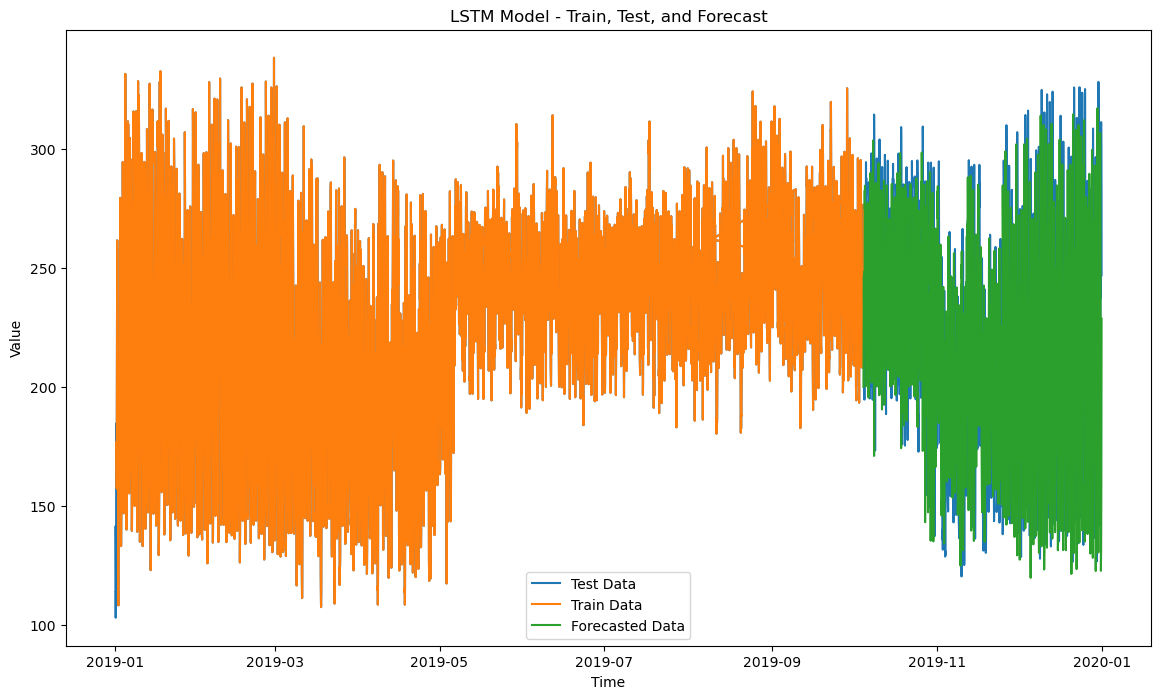

Epoch 1/20
231/231 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - loss: 0.0599
Epoch 2/20
231/231 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0143
Epoch 3/20
231/231 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0066
Epoch 4/20
231/231 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0053
Epoch 5/20
231/231 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0052
Epoch 6/20
231/231 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0050
Epoch 7/20
231/231 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0051
Epoch 8/20
231/231 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0051
Epoch 9/20
231/231 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0049
Epoch 10/20
231/231 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0046
Epoch 11/20
231/231 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0046
Epoch 12/20
231/231 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0046
Epoch 13/20
231/231 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0047
Epoch 14/20
231/231 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0047
Epoch 15/20
231/231 ━━━━━━━━━━━━━━━━━━━━ 3s

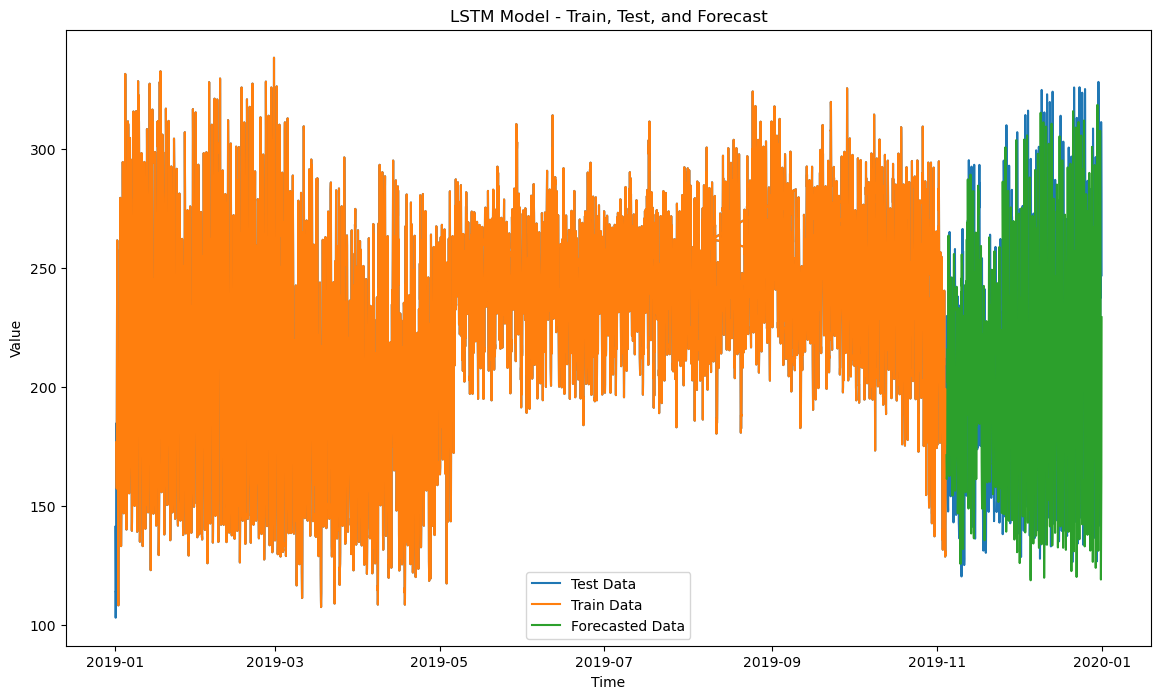

Epoch 1/20
254/254 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - loss: 0.0531
Epoch 2/20
254/254 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0107
Epoch 3/20
254/254 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0061
Epoch 4/20
254/254 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0055
Epoch 5/20
254/254 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0047
Epoch 6/20
254/254 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0050
Epoch 7/20
254/254 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0049
Epoch 8/20
254/254 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0046
Epoch 9/20
254/254 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0048
Epoch 10/20
254/254 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0047
Epoch 11/20
254/254 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0048
Epoch 12/20
254/254 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0046
Epoch 13/20
254/254 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0047
Epoch 14/20
254/254 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0046
Epoch 15/20
254/254 ━━━━━━━━━━━━━━━━━━━━ 3s

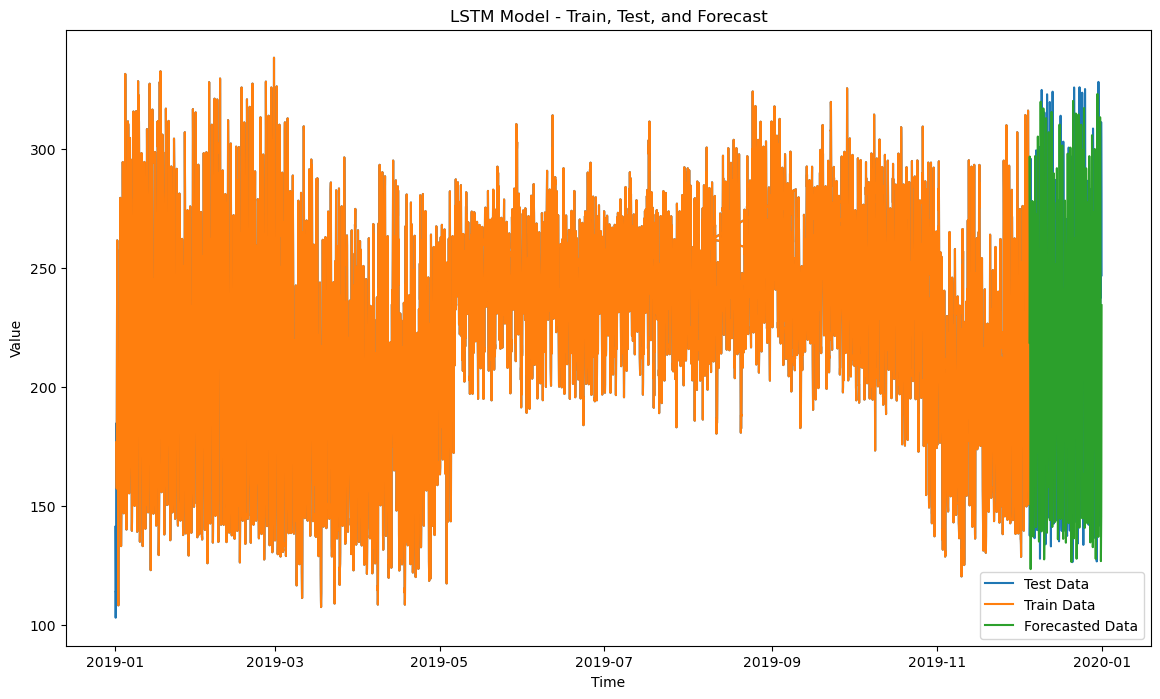

In [3]:
LSTM_Modeling('data/input_data2019.csv', 'I1', 9/12, 'Train, Test, and Forecasted Data with LSTM Model (9/12 train)')
LSTM_Modeling('data/input_data2019.csv', 'I1', 10/12, 'Train, Test, and Forecasted Data with LSTM Model (10/12 train)')
LSTM_Modeling('data/input_data2019.csv', 'I1', 11/12, 'Train, Test, and Forecasted Data with LSTM Model (11/12 train)')

<a id='lstm2'> </a>
## Modeling with LSTM After Augmenting
###  All periods of train/test for the first phase

Epoch 1/20
830/830 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - loss: 0.0297
Epoch 2/20
830/830 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - loss: 0.0061
Epoch 3/20
830/830 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - loss: 0.0058
Epoch 4/20
830/830 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - loss: 0.0057
Epoch 5/20
830/830 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0053
Epoch 6/20
830/830 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0054
Epoch 7/20
830/830 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0053
Epoch 8/20
830/830 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0052
Epoch 9/20
830/830 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0051
Epoch 10/20
830/830 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0051
Epoch 11/20
830/830 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0050
Epoch 12/20
830/830 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0051
Epoch 13/20
830/830 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0049
Epoch 14/20
830/830 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0050
Epoch 15/20
830/830 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/ste

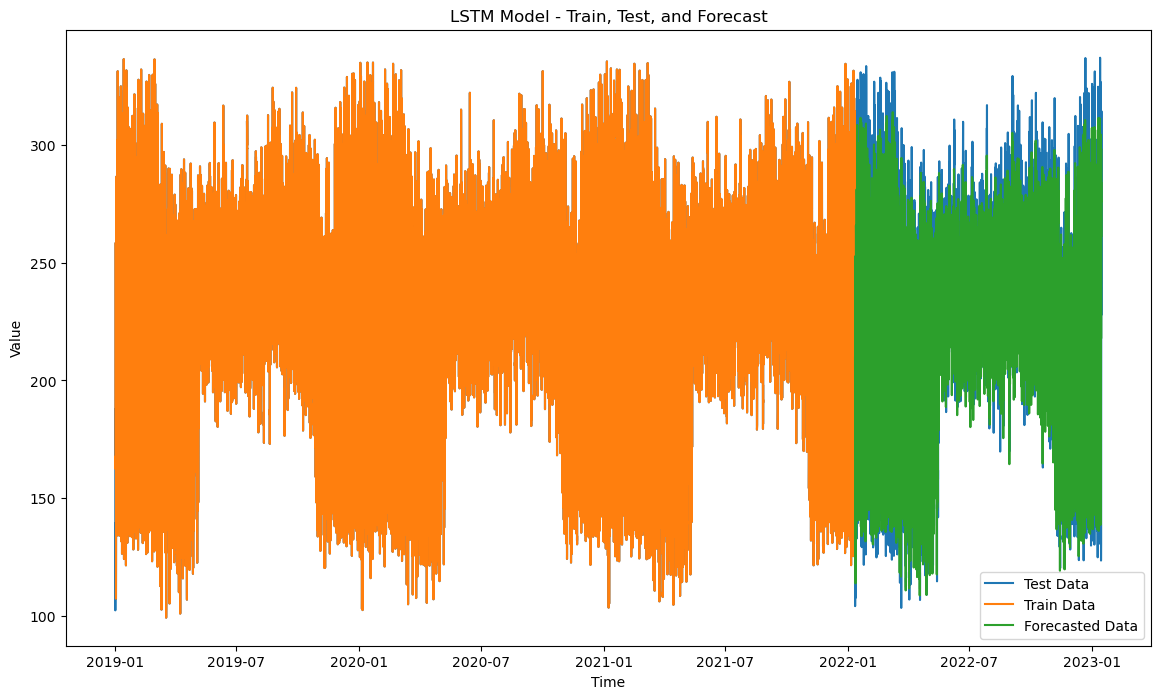

Epoch 1/20
968/968 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.0238
Epoch 2/20
968/968 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.0058
Epoch 3/20
968/968 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.0056
Epoch 4/20
968/968 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0056
Epoch 5/20
968/968 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0054
Epoch 6/20
968/968 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0054
Epoch 7/20
968/968 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0052
Epoch 8/20
968/968 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0052
Epoch 9/20
968/968 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0051
Epoch 10/20
968/968 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0052
Epoch 11/20
968/968 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0050
Epoch 12/20
968/968 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0051
Epoch 13/20
968/968 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0049
Epoch 14/20
968/968 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0050
Epoch 15/20
968/968 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - lo

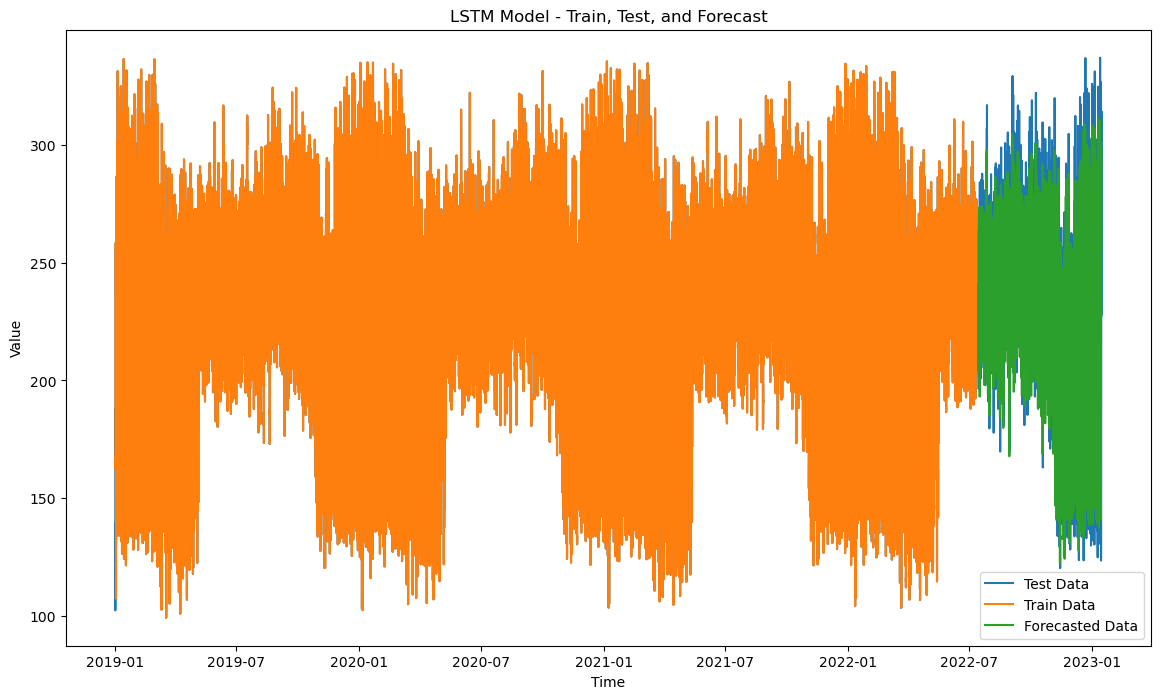

Epoch 1/20
1037/1037 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 0.0267
Epoch 2/20
1037/1037 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.0057
Epoch 3/20
1037/1037 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.0056
Epoch 4/20
1037/1037 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.0054
Epoch 5/20
1037/1037 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.0053
Epoch 6/20
1037/1037 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.0052
Epoch 7/20
1037/1037 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.0051
Epoch 8/20
1037/1037 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.0051
Epoch 9/20
1037/1037 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.0050
Epoch 10/20
1037/1037 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.0050
Epoch 11/20
1037/1037 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.0049
Epoch 12/20
1037/1037 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.0049
Epoch 13/20
1037/1037 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0049
Epoch 14/20
1037/1037 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0048
Epoch 15/20
1037/1037 ━━━━━━━

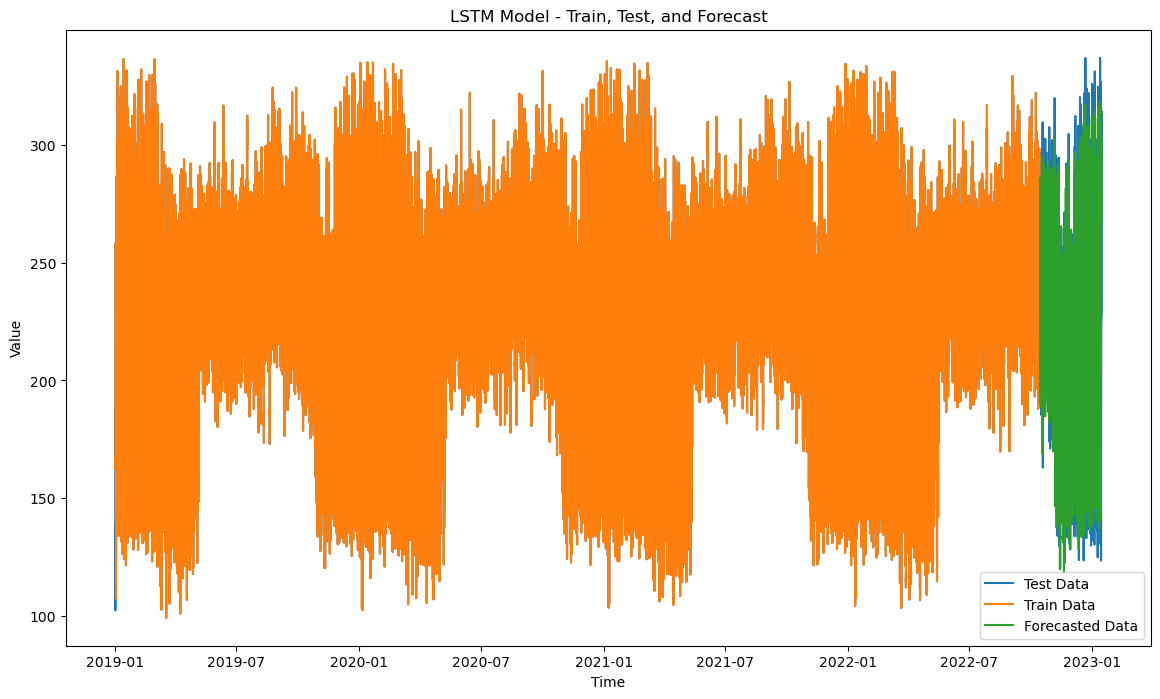

In [5]:
LSTM_Modeling('input_data2019-augmented.csv', 'I1', 36/48, 'Train, Test, and Forecasted Data with LSTM Model (36/48 train)')
LSTM_Modeling('input_data2019-augmented.csv', 'I1', 42/48, 'Train, Test, and Forecasted Data with LSTM Model (42/48 train)')
LSTM_Modeling('input_data2019-augmented.csv', 'I1', 45/48, 'Train, Test, and Forecasted Data with LSTM Model (45/48 train)')